In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

Observation: There are 7043 rows and 21 columns in our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation: Here we can observe that, there are float64(1), int64(2), object(18) data types. And also there are no missing values in our dataset

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('============================================')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
gender : ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
Partner : ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents : ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService : ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines : ['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService : ['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity : ['No' 'Yes' 'No internet service']
No    

# EDA:

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observation: we can observe that, our data distribution is good. if we are looking into 'SeniorCitizen' column, it's a catogrical data. we are not going to bother about that. The remaining two columns i.e., 'tenure' and 'MonthlyCharges' . these were continuous data and the difference between quantiles is following similar pattern and also std deviation is less than mean. Hence, our data distribution is good

# Univariate Analysis:

plotting countplot for categorical columns:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
cat_features=df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]

Male      3555
Female    3488
Name: gender, dtype: int64


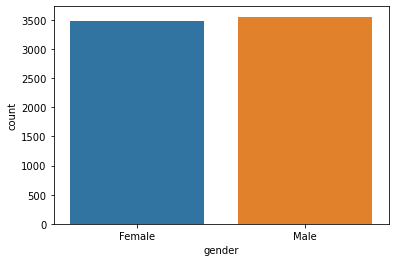

In [10]:
sns.countplot(df['gender'])
print(df['gender'].value_counts())

Observation: we can observe that, the total number of female customer is 3488 and male is 3555.

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Observation: we can see here 'TotalCharges' column having continuous data. but it is showing 'Object' data type. So, we have to handle this.

In [12]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Observation: here we can see that, there is 11 columns where white spaces is present as value. That's the reason it is showing object data type.We have to replace this by NaN 

In [13]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [14]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Converting the 'TotalCharge' column type from object to float

In [15]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [16]:
df['TotalCharges'].dtypes

dtype('float64')

In [17]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [18]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation: we have successfully converted the data type from object to float64 and fill NaN with the mean value

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


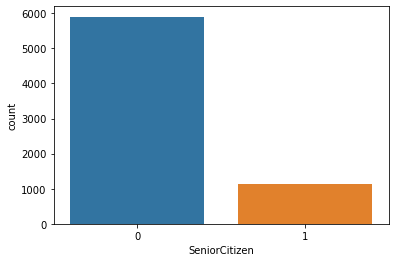

In [20]:
sns.countplot(df['SeniorCitizen'])
print(df['SeniorCitizen'].value_counts())

Observation: from the above observation total number of younger customer is 5901 and senior citizen customer is 1142.

No     3641
Yes    3402
Name: Partner, dtype: int64


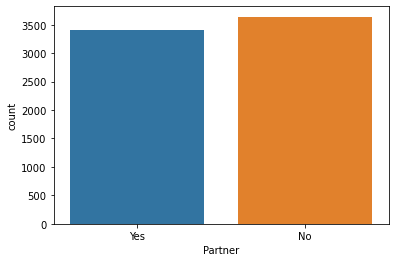

In [21]:
sns.countplot(df['Partner'])
print(df['Partner'].value_counts())

Observation: from the above observation total number of married couple is 3402 and single customer is 3641

No     4933
Yes    2110
Name: Dependents, dtype: int64


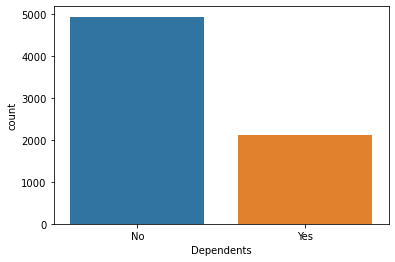

In [22]:
sns.countplot(df['Dependents'])
print(df['Dependents'].value_counts())

Observation: from the above observation total number of dependent customer is 2110 and independent customer is 4933

Yes    6361
No      682
Name: PhoneService, dtype: int64


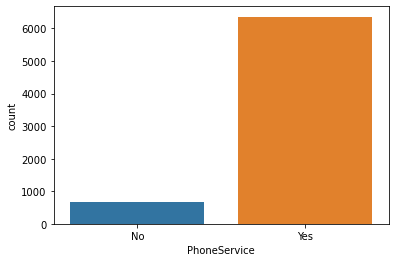

In [23]:
sns.countplot(df['PhoneService'])
print(df['PhoneService'].value_counts())

Observation: From the above observation total number of customer using Phone Service is 6361 and total number of customer not using phone is 682. we can see the big difference here

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


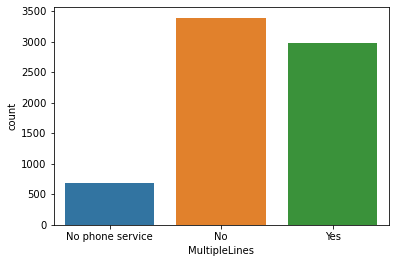

In [24]:
sns.countplot(df['MultipleLines'])
print(df['MultipleLines'].value_counts())

Observation: From the above observation total number of customer not using phone service is 682 , using no multiple service is 3390 and using multiple service is 2971

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


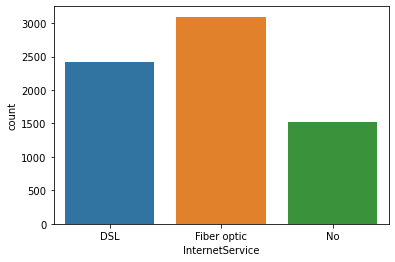

In [25]:
sns.countplot(df['InternetService'])
print(df['InternetService'].value_counts())

Observation: From the above observation total number of customer not using intern services are 1526, using internet services through DSL is 2421 and using internet services through fibre optics is 3096.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


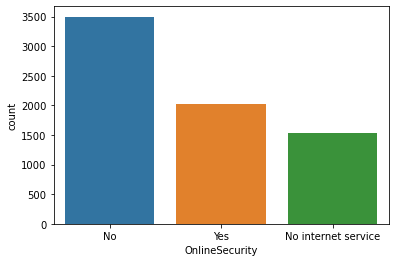

In [26]:
sns.countplot(df['OnlineSecurity'])
print(df['OnlineSecurity'].value_counts())

Observation: from the above observation total number of customer having onlinesecurity in his phone is 2019, and customer not having online security is 3498, and customer having no internet service in his phone are 1526

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


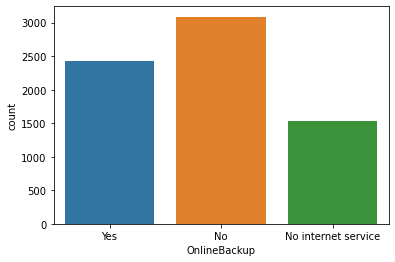

In [28]:
sns.countplot(df['OnlineBackup'])
print(df['OnlineBackup'].value_counts())

Observation: From the above observation total number of customer having online backup in his phone are 2429, customers not having online backup in his phone are 3088 and customer having no internet service then how could he/she has the online backup and that number is 1526

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


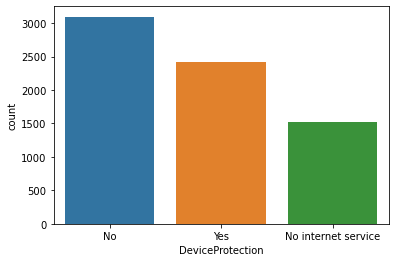

In [29]:
sns.countplot(df['DeviceProtection'])
print(df['DeviceProtection'].value_counts())

Observation: From the above observation total number of customer having device protection are 2422, customers not having device protection in his phone are 3095 and customer having no internet service then how could he/she has the device protection and that number is 1526

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


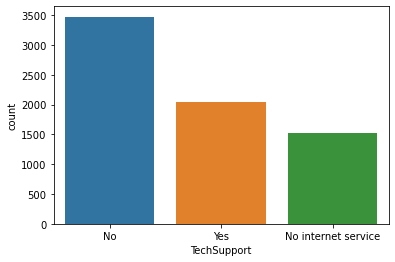

In [30]:
sns.countplot(df['TechSupport'])
print(df['TechSupport'].value_counts())

Observation: From the above observation total number of customer having tach support are 3473, customers not having Tech support are 3095 and customer having no internet service then how could he/she has the Tech Support service and that number is 1526

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


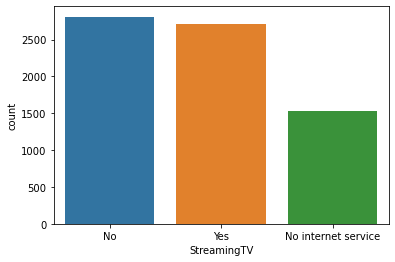

In [32]:
sns.countplot(df['StreamingTV'])
print(df['StreamingTV'].value_counts())

Observation: from the above observation total number of customer using stramingTV service are 2810, customer not using Streaming TV service are 2707 , and customers having no internet service are 1526

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


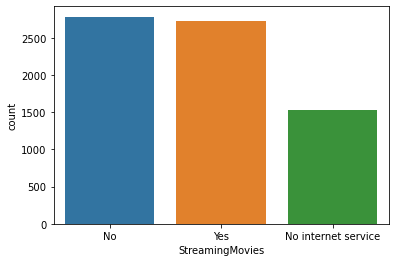

In [34]:
sns.countplot(df['StreamingMovies'])
print(df['StreamingMovies'].value_counts())

Observation: from the above observation total number of customer using Straming Movies service are 2732, customer not using straming movies service are 2785, and customers don't have internet service are 1526

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


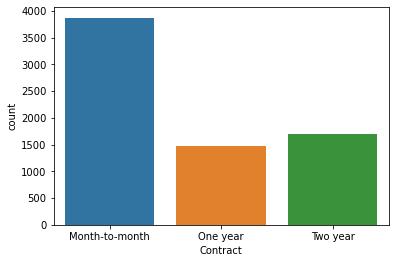

In [35]:
sns.countplot(df['Contract'])
print(df['Contract'].value_counts())

From tha above observation we have observed that customers taking month-to-month contract are large numbers as compared to one year and  2 year contract. Let's talk about numbers, customers having month-to-month contract are 3875 , customers having one year contract are 1473 and customers having 2 year contract are 1695

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


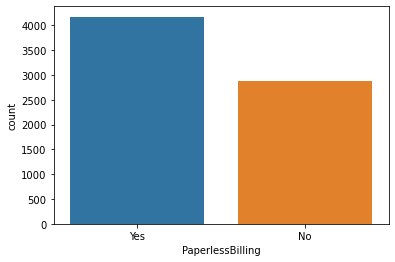

In [36]:
sns.countplot(df['PaperlessBilling'])
print(df['PaperlessBilling'].value_counts())

Observation: from the above observation we have observe that, In today's era maximum were using paperless billing instead of paper billing. Customers using paperless billing are 4171 and customer not using paperless billing are 2872

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


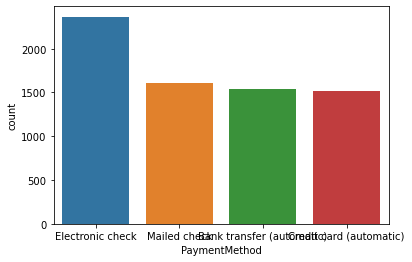

In [37]:
sns.countplot(df['PaymentMethod'])
print(df['PaymentMethod'].value_counts())

from the above observation total number of customers using Electronic check method are 2365, total number of customers using mailed check are 1612, total number of customers using automatic bank transfer are 1544 and total number of customer using credit card method are 1522

# Analysis for target variable:

No     5174
Yes    1869
Name: Churn, dtype: int64


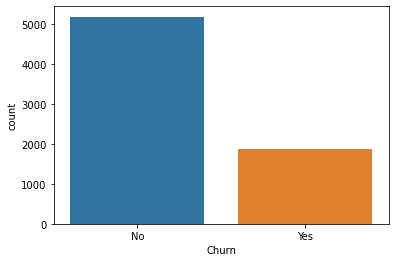

In [38]:
sns.countplot(df['Churn'])
print(df['Churn'].value_counts())

From the above observation company were able to retained his customer are 1869 is very less as comapre to customers who's not shifting to other company or operator are 5174.
since this is our target variable . so, this should be equally distributed data in each category but there is a huge gap between yes or no. It means Imbalanced data. we'll treat them

# Analysis for ordinal categorical variable:

<Figure size 1080x504 with 0 Axes>

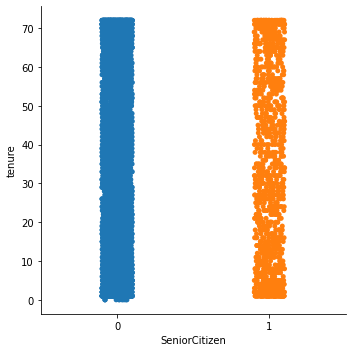

In [42]:
plt.figure(figsize=(15,7))
sns.catplot(x='SeniorCitizen',y='tenure',data=df)

Observation: we can see the spred of the data is normal

# checking the distribution of the continuous type column

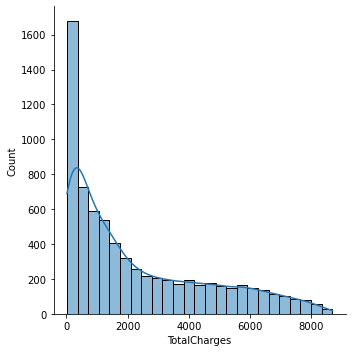

In [44]:
sns.displot(df['TotalCharges'],kde=True)

Observation: we can see here data is righly skewed and maximum data points having concentrated at 0. We have to deal with this

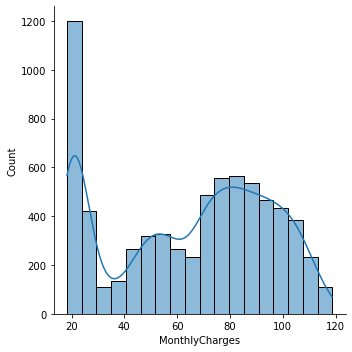

In [45]:
sns.displot(df['MonthlyCharges'],kde=True)

Observation: here the data distribution is quite normal. But most of the data points are concentrated at 20

# Describe the data:

In [46]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Observation: we can observe that 'TotalCharges' column is skewed. because of the difference between the quantiles is not proper or following the same trend. And also the mean is almost equal to std deviation, which is not good for data distribution . std deviation should be very very less as compared to mean. we'll check the skewness.

# Using LabelEncoder for converting categorical to numerical

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [49]:
#droping unnecessary column:
df=df.drop(['customerID'],axis=1)

# Skewness handling

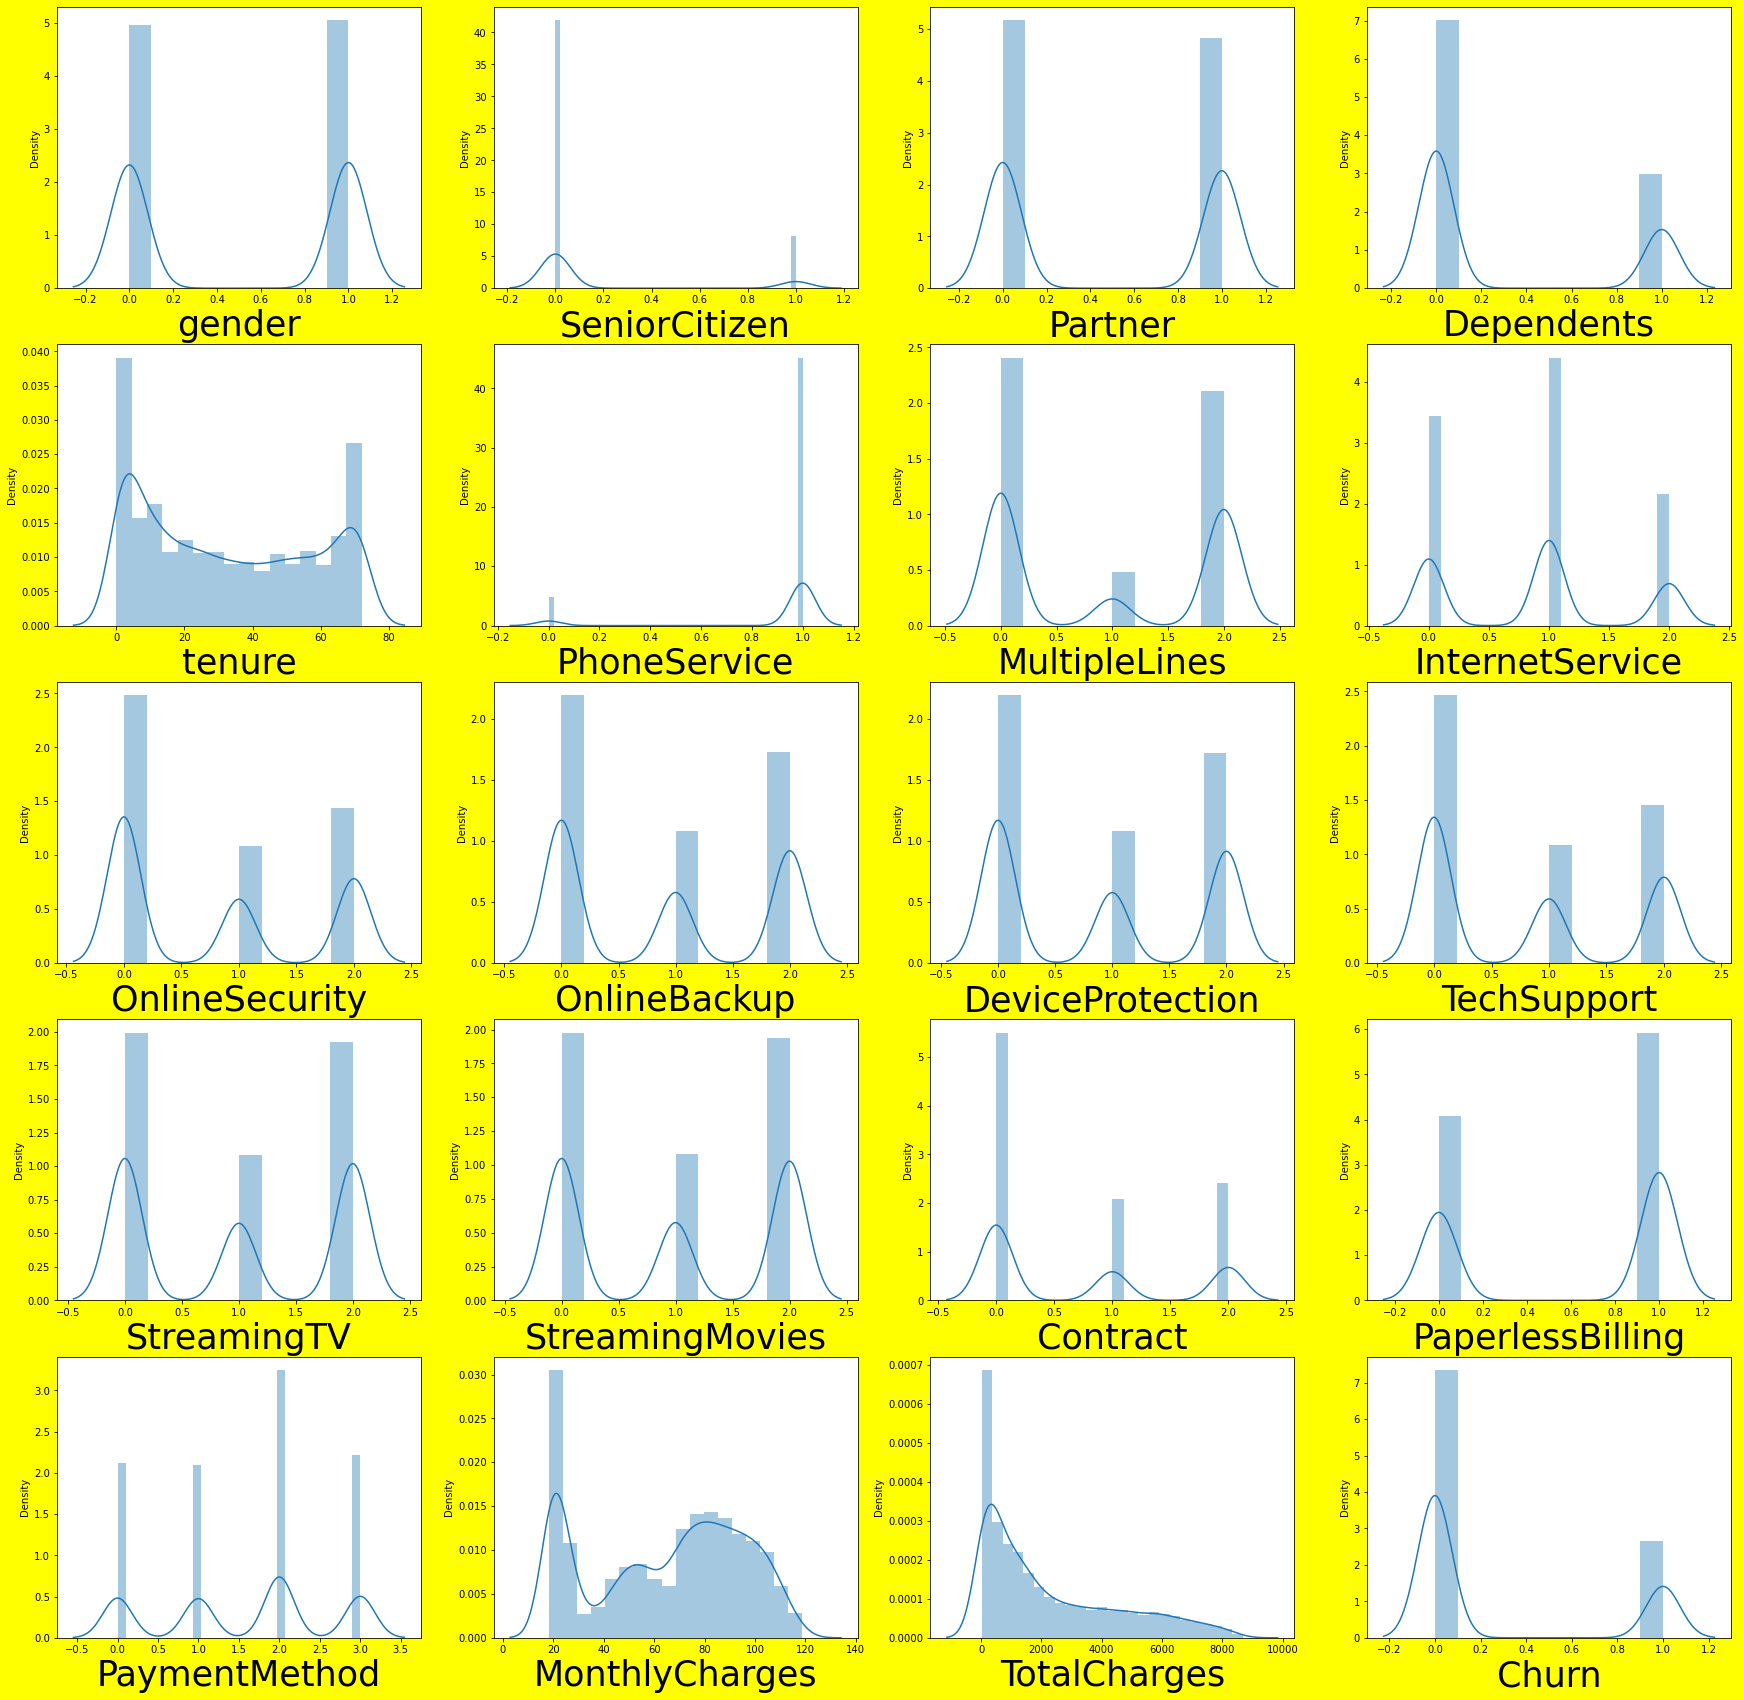

In [50]:
plt.figure(figsize=(30,30),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=35)
        
        plotnumber+=1
plt.show()

In [52]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Observation: from the above observation we have observe that skewness is present. more that +/- 0.5 will be treated. But there is a criteria that we only go for the continuous column and not bother  about categorical ones. So, there are only one column 'TotalCharges' is skewed. we'll handle this

In [53]:
from sklearn.preprocessing import power_transform

In [57]:
df[['TotalCharges']]=power_transform(df[['TotalCharges']])

In [58]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.144899
Churn               1.063031
dtype: float64

Observation: skewness is sucessfully removed

In [59]:
df.shape

(7043, 20)

# Outliers Handling

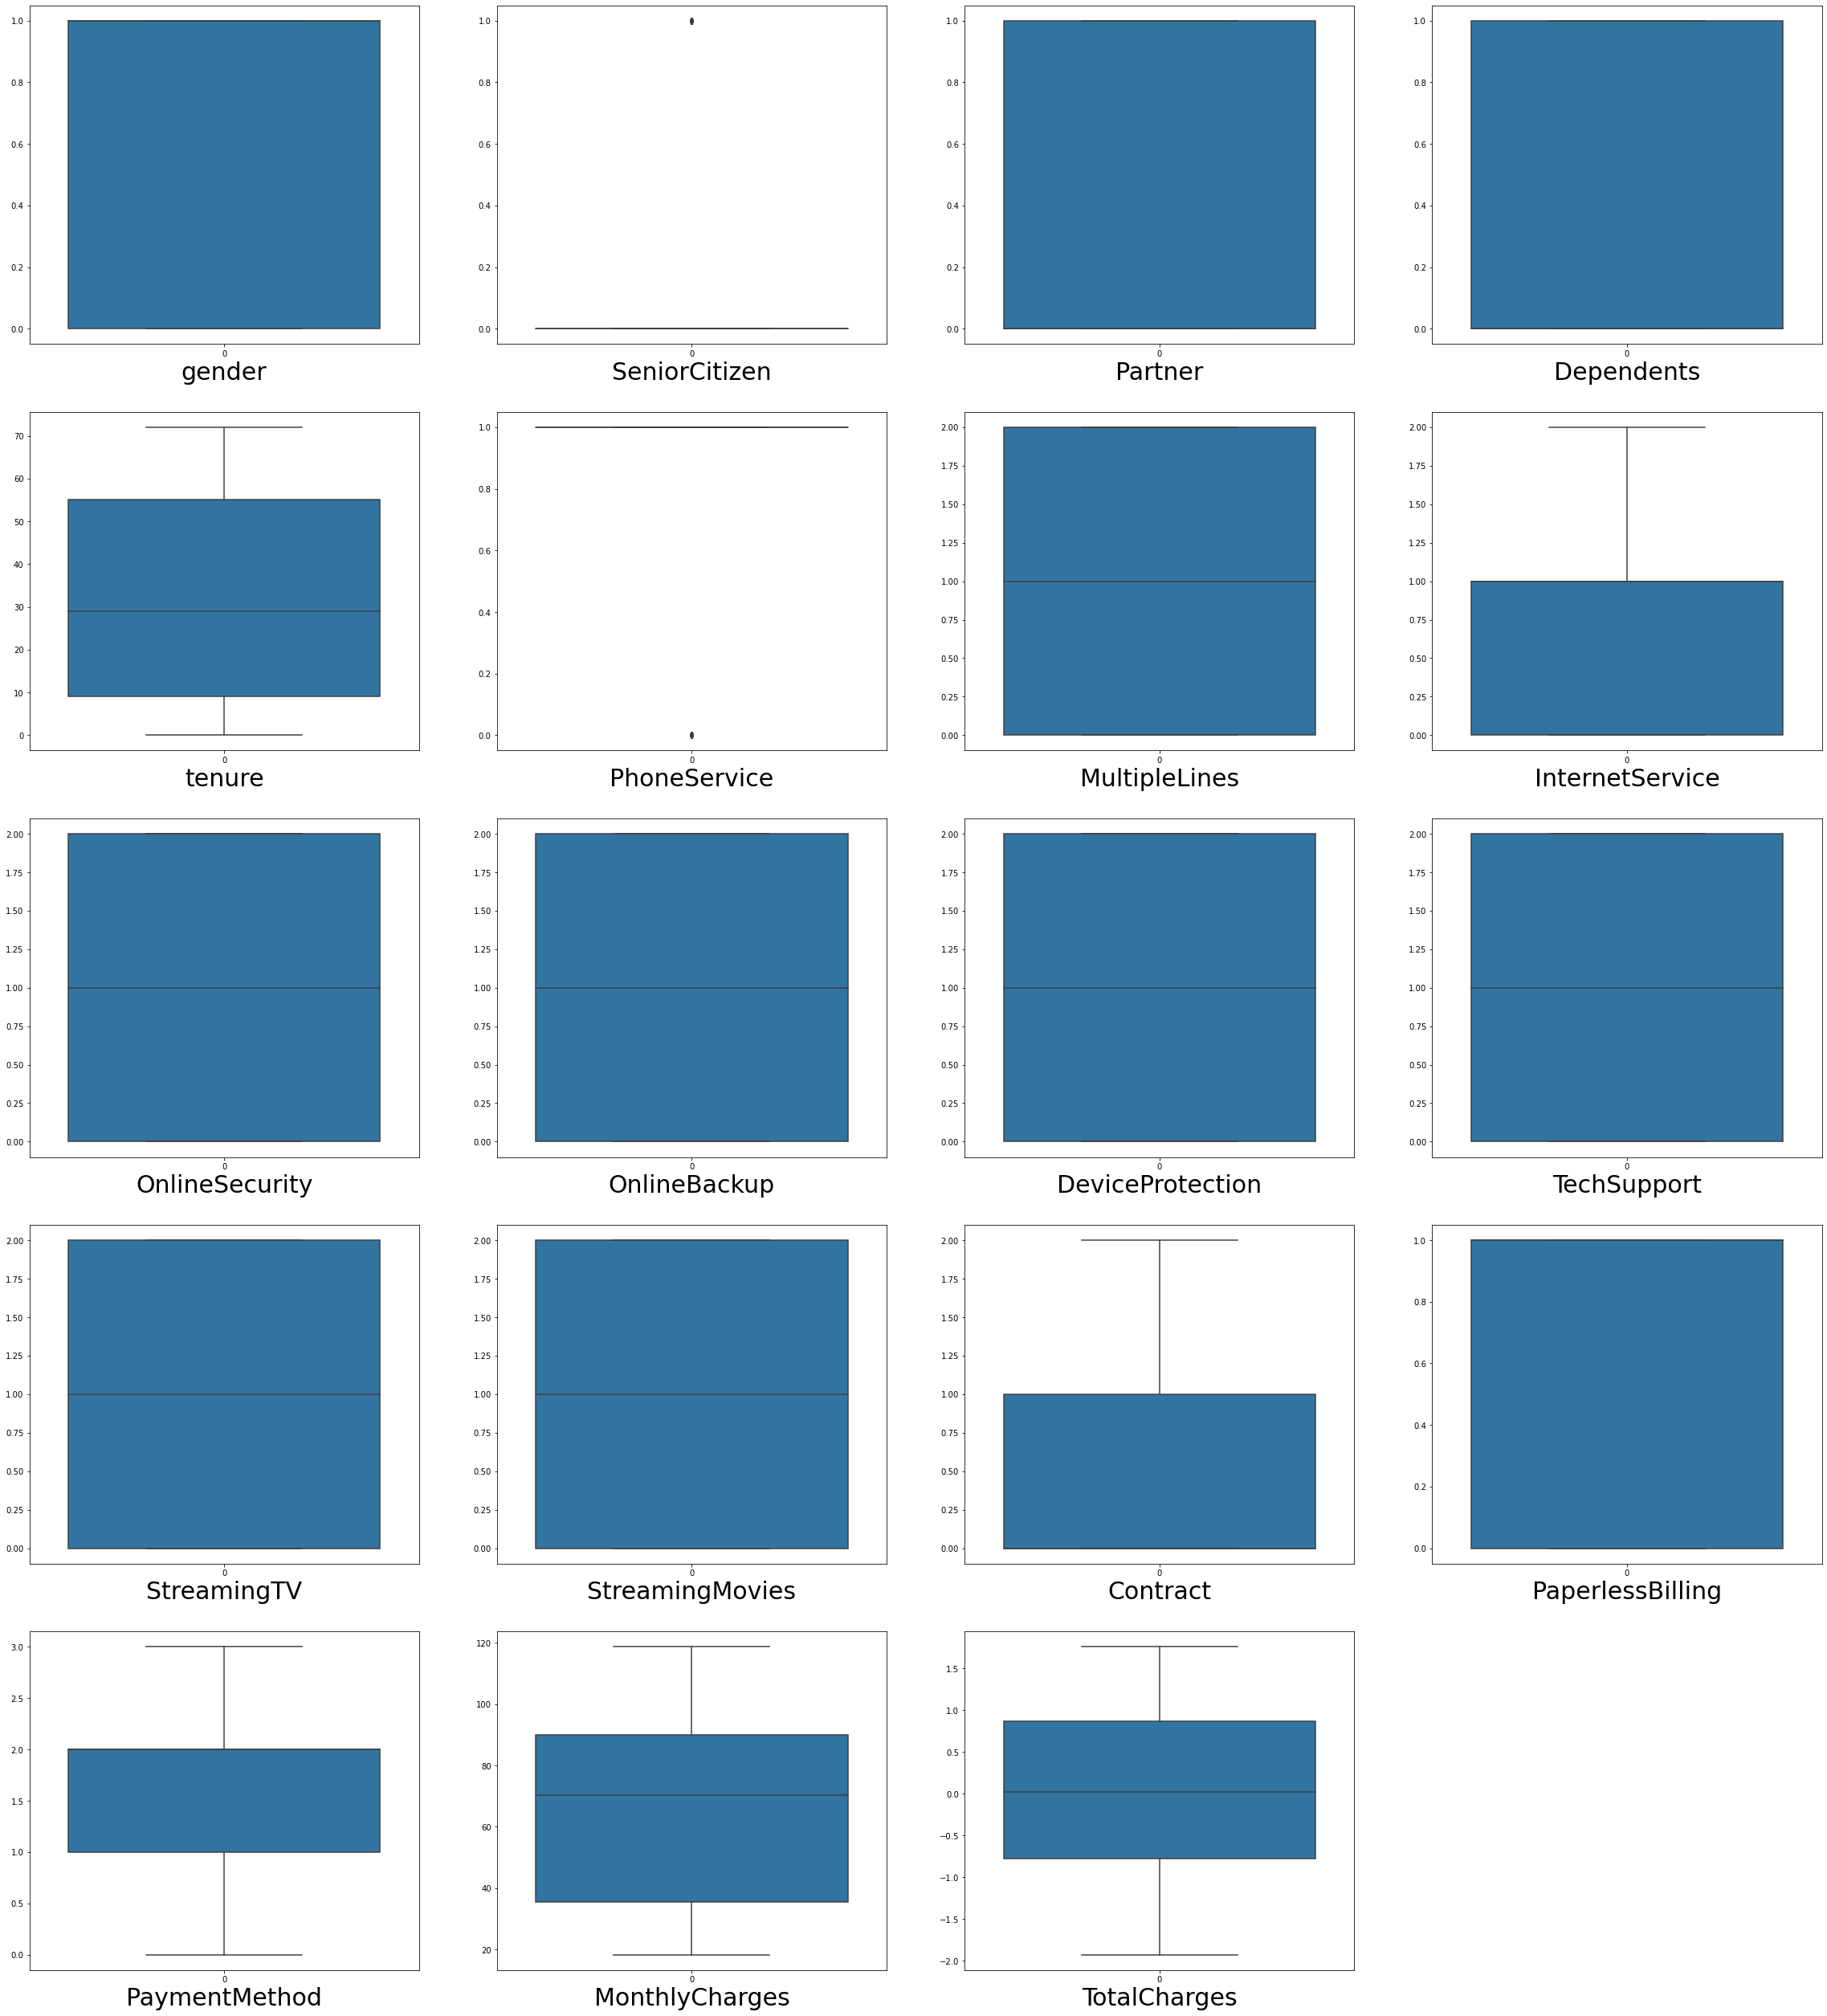

In [60]:
plt.figure(figsize=(40,45))
plotnumber=1

for column in df:
    if plotnumber<20:
        plt.subplot(5,4,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=30)
        
        plotnumber+=1
plt.show()

# Outliers removal:

In [67]:
df.shape

(7043, 20)

In [68]:
from scipy.stats import zscore

z=np.abs(zscore(df))
thresold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [69]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,-0.354157,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,0.278642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,0.030280,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0.295688,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,1.567097,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,-0.922968,1


In [70]:
df_new_z.shape

(6361, 20)

percentage loss of data:

In [72]:
data_loss=(((7043-6361)/7043)*100)
data_loss

9.683373562402386

Observation: our data is becoming biased as it is not considering the case of senior citizen, so we are not removing the outliers

# Plotting the Heatmap:

Checking the correlation coefficient with one column to another column and also going to check for the multicollinearity problem exists or not

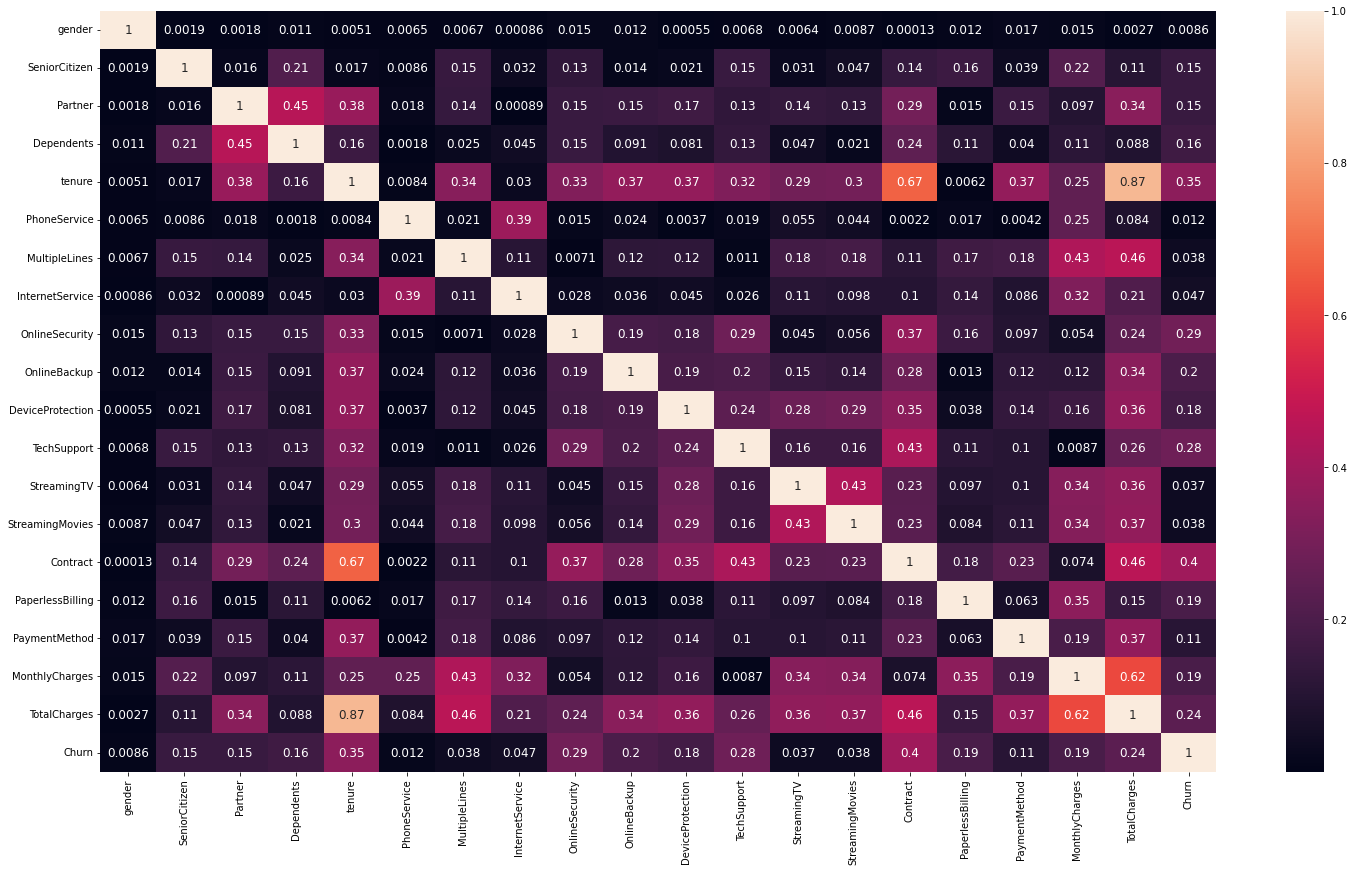

In [63]:
df_corr=df.corr().abs()

plt.figure(figsize=(25,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

# Correlation of the column with the target variable:

In [64]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.237089
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

# Checking the columns which are positively and negatively correlated with target column:

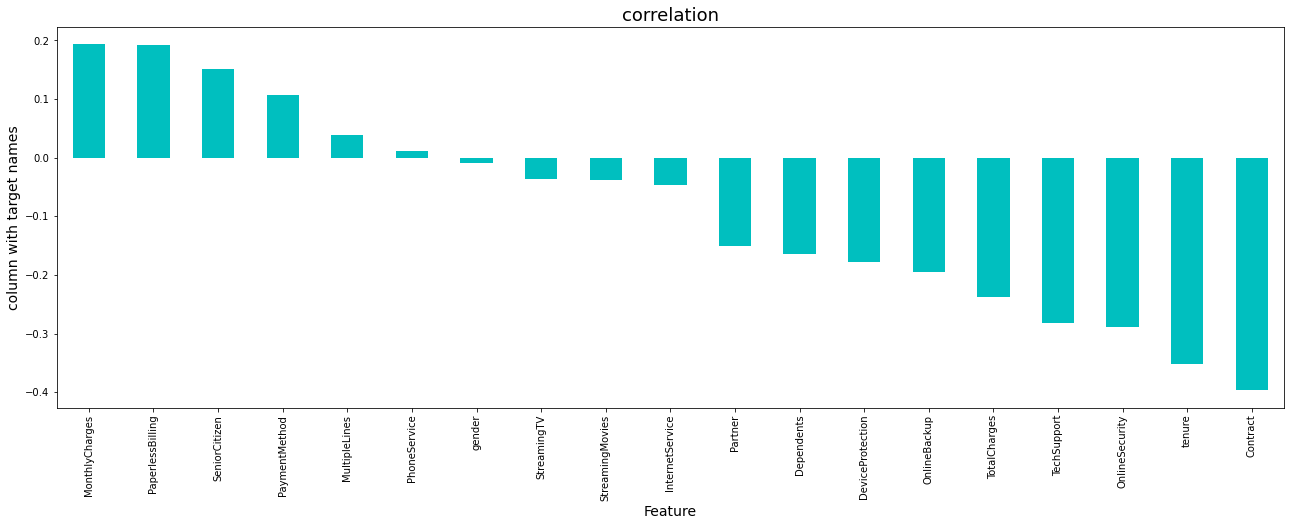

In [66]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [73]:
df['Churn'].unique()

array([0, 1])

# Dividing data into X and Y

In [74]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [75]:
x.shape

(7043, 19)

In [76]:
y.shape

(7043,)

# scaling X values

In [77]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [78]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [79]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.470254,0.436462,0.395002,0.453216,0.452222,0.398552,0.492688,0.496237,0.345236,0.592219,0.524776,0.462803,0.523029
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.474277,0.368898,0.429924,0.440081,0.439974,0.430775,0.442501,0.442545,0.416878,0.491457,0.356035,0.299403,0.271058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.171642,0.311585
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.666667,0.518408,0.528518
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,0.712438,0.758301
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation: data have been scalled

# Imbalanced learn:

Using OverSamling_BorderlineSMOTE

because there is less data in churn for yes

<AxesSubplot:xlabel='Churn', ylabel='count'>

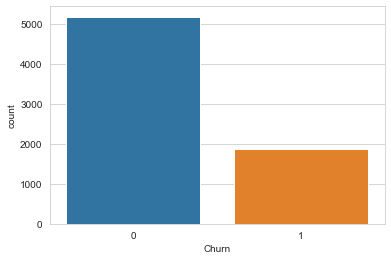

In [82]:
sns.set_style("whitegrid")
sns.countplot(x="Churn", data=df)

Observation:

We can see here Data is not fully balance but we'll treat the imbalace.
we have around 1800 in yes and around 5200 in no.

In [83]:
from imblearn.over_sampling import BorderlineSMOTE

In [84]:
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (7043,)
Resample Target dataset shape (10348,)


<AxesSubplot:xlabel='Churn', ylabel='count'>

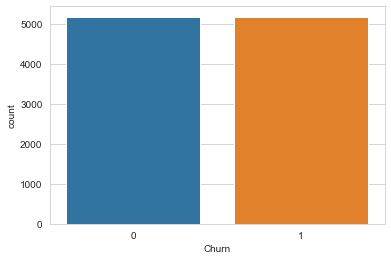

In [85]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Observation: Now we have balaced data for model training

# Spliting Train and Test data

In [86]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [94]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{LR.score(x_train,y_train)}')
    print(f'At random state {i}, The test accuracy is:-{accuracy_score(y_test,LR_predict_test)}')

At random state 0, The training accuracy is:-0.7633036979770648
At random state 0, The test accuracy is:-0.758020873598763
At random state 1, The training accuracy is:-0.7621440536013401
At random state 1, The test accuracy is:-0.7564746810977967
At random state 2, The training accuracy is:-0.7617575054760984
At random state 2, The test accuracy is:-0.766524932354078
At random state 3, The training accuracy is:-0.7634325473521454
At random state 3, The test accuracy is:-0.7587939698492462
At random state 4, The training accuracy is:-0.7589228192243268
At random state 4, The test accuracy is:-0.7526091998453808
At random state 5, The training accuracy is:-0.7644633423527896
At random state 5, The test accuracy is:-0.7587939698492462
At random state 6, The training accuracy is:-0.7602113129751321
At random state 6, The test accuracy is:-0.7584074217240047
At random state 7, The training accuracy is:-0.7683288236052055
At random state 7, The test accuracy is:-0.741012756088133
At random s

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [96]:
x_train.shape

(7554, 19)

In [97]:
x_test.shape

(2794, 19)

In [98]:
y_train.shape

(7554,)

In [99]:
y_test.shape

(2794,)

# MODEL BUILDING:

In [100]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [101]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7600494065839642


In [102]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7738010021474588
[[1036  384]
 [ 248 1126]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1420
           1       0.75      0.82      0.78      1374

    accuracy                           0.77      2794
   macro avg       0.78      0.77      0.77      2794
weighted avg       0.78      0.77      0.77      2794

Training accuracy:: 0.7607889859676993
Test accuracy:: 0.7738010021474588


# DECISION TREE CLASSIFIER

In [103]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7840249554616923


In [104]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7920544022906227
[[1115  305]
 [ 276 1098]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1420
           1       0.78      0.80      0.79      1374

    accuracy                           0.79      2794
   macro avg       0.79      0.79      0.79      2794
weighted avg       0.79      0.79      0.79      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.7920544022906227


# KNeighborsClassifier:

In [105]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7825685352909175


In [106]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7938439513242663
[[ 942  478]
 [  98 1276]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1420
           1       0.73      0.93      0.82      1374

    accuracy                           0.79      2794
   macro avg       0.82      0.80      0.79      2794
weighted avg       0.82      0.79      0.79      2794

Training accuracy:: 0.8379666401906275
Test accuracy:: 0.7938439513242663


# RandomForestClassifier:

In [107]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8527337298001555


In [108]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.857193987115247
[[1193  227]
 [ 172 1202]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1420
           1       0.84      0.87      0.86      1374

    accuracy                           0.86      2794
   macro avg       0.86      0.86      0.86      2794
weighted avg       0.86      0.86      0.86      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.857193987115247


# ENSEMBLE TECHNIQUES

# 1.ADA BOOST CLASSIFIER

In [109]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8099202010857885


In [110]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8167501789549033
[[1084  336]
 [ 176 1198]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1420
           1       0.78      0.87      0.82      1374

    accuracy                           0.82      2794
   macro avg       0.82      0.82      0.82      2794
weighted avg       0.82      0.82      0.82      2794

Training accuracy:: 0.8158591474715382
Test accuracy:: 0.8167501789549033


# 2. Gradient Boosting classifier

In [111]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.827801698763771


In [112]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",accuracy_score(y_test,predicted_grbc))

0.8392984967788117
[[1135  285]
 [ 164 1210]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1420
           1       0.81      0.88      0.84      1374

    accuracy                           0.84      2794
   macro avg       0.84      0.84      0.84      2794
weighted avg       0.84      0.84      0.84      2794

Training accuracy:: 0.8441885093989939
Test accuracy:: 0.8392984967788117


# plotting roc curve:

plotting for training score for different models:

In [113]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

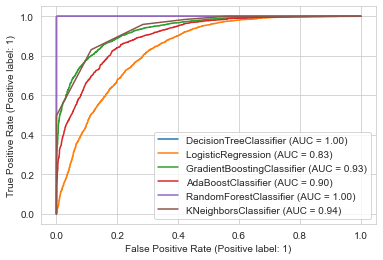

In [114]:
disp=plot_roc_curve(dtc,x_train,y_train)

plot_roc_curve(logreg,x_train,y_train,ax=disp.ax_)

plot_roc_curve(grbc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(adb,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

<Figure size 2160x2160 with 0 Axes>

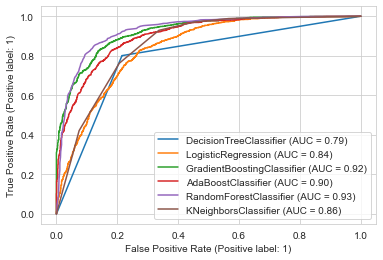

In [115]:
plt.figure(figsize=(30,30))
disp=plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(logreg,x_test,y_test,ax=disp.ax_)

plot_roc_curve(grbc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# Conclusion:

# choosing Random Forest Classifier as best model for our dataset as it is giving the best test accuracy. So, this is our final model

# HYPER PARAMETER TUNING:

In [116]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [117]:
gridsearch=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)

In [118]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]})

In [119]:
gridsearch.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 1000,
 'random_state': 10}

In [120]:
rfc=gridsearch.best_estimator_
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=10)

In [121]:
print(rfc.score(x_train,y_train))
predicted_rfc=rfc.predict(x_test)

0.9989409584326184


In [122]:
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8565025462136017


In [123]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8668575518969219
[[1209  211]
 [ 161 1213]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1420
           1       0.85      0.88      0.87      1374

    accuracy                           0.87      2794
   macro avg       0.87      0.87      0.87      2794
weighted avg       0.87      0.87      0.87      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.8668575518969219


Observation: we can see here, there is a slightly increment in our testing score. And this is our successful model

# Report of RandomForestClassifier

In [124]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,predicted_rfc))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      1420
           1       0.85      0.88      0.87      1374

    accuracy                           0.87      2794
   macro avg       0.87      0.87      0.87      2794
weighted avg       0.87      0.87      0.87      2794



<AxesSubplot:>

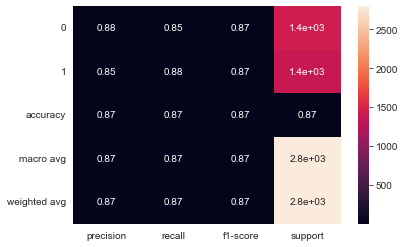

In [125]:
clsf_repo = classification_report(y_test,predicted_rfc,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [126]:
print("roc auc score::",roc_auc_score(y_test,predicted_rfc))

roc auc score:: 0.8671161613055334


In [127]:
fpr1, tpr1, thresh1 = roc_curve(y_test,predicted_rfc, pos_label=1)

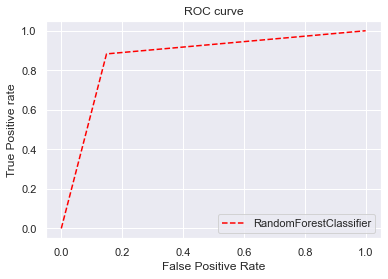

In [128]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='RandomForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [129]:
import pickle
filename='Customer_churn_analysis_project.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [130]:
loaded_model=pickle.load(open('Customer_churn_analysis_project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.68575518969219
